In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt                                                                                
import random 

# Seed 
random.seed(10)


size = 25 # No. de Clientes
l = 1 # Promedio de llegadas por minuto
µ =0.8 # promedio de personas atendidas por minuto

# Serie de clientes
Cliente = [i for i in range(1,size+1)]

# Tiempo entre llegadas
T_entre_Llegadas = list(np.random.exponential(scale=1/l,size=size))

# Tiempo de Servicio 1
T_de_Servicio1 = list(np.random.exponential(scale=1/µ,size=size))

# Tiempo de Servicio 2
T_de_Servicio2 = list(np.random.exponential(scale=1/µ,size=size))



print(len(T_entre_Llegadas),len(T_de_Servicio1))

# Calcular tiempo de llegada
T_llegada1 = [0 for i in range(size)]

# Inicial
T_llegada1[0] = round(T_entre_Llegadas[0],2)

for i in range(1,size):
  T_llegada1[i] = round((T_entre_Llegadas[i]+T_llegada1[i-1]),2)
 
#servidor1
Inicio_T_servicio1 = [0 for i in range(size)]
T_Espera_en_Cola1 = [0 for i in range(size)]
Final_T_Servicio1 = [0 for i in range(size)]
T_Cliente_en_Sistema1 = [0 for i in range(size)]
Sistema_libre1 = [0 for i in range(size)]

Inicio_T_servicio1[0] = round((T_llegada1[0]),2)
Final_T_Servicio1[0] = round((T_de_Servicio1[0]),2)
T_Cliente_en_Sistema1[0] = round(T_de_Servicio1[0],2)

#servidor2
Inicio_T_servicio2 = [0 for i in range(size)]
T_Espera_en_Cola2 = [0 for i in range(size)]
Final_T_Servicio2 = [0 for i in range(size)]
T_Cliente_en_Sistema2 = [0 for i in range(size)]
Sistema_libre2 = [0 for i in range(size)]
T_llegada2 = [0 for i in range(size)]

T_llegada2[0] = Final_T_Servicio1[0]
Inicio_T_servicio2[0] = round((Final_T_Servicio1[0]),2)
Final_T_Servicio2[0] = round(Inicio_T_servicio2[0] + T_de_Servicio2[0],2)  
T_Cliente_en_Sistema2[0] = round(T_de_Servicio2[0],2)


  



for i in range(1,size):

#servidor1

  # Inincio Tiempo de Servicio 
  Inicio_T_servicio1[i] = round(max(T_llegada1[i],Final_T_Servicio1[i-1]),2)

  # Tiempo de Espera en la Cola  
  T_Espera_en_Cola1[i] = round(Inicio_T_servicio1[i]-T_llegada1[i],2)

  # Tiempo en que Servicio Termina
  Final_T_Servicio1[i] = round(Inicio_T_servicio1[i] + T_de_Servicio1[i],2)  

  # Tiempo que el Cliente Gasto en el Sistema
  T_Cliente_en_Sistema1[i] = round(Final_T_Servicio1[i] - T_llegada1[i],2)

  # Tiempo sistema permanece libre
  if (T_llegada1[i]>Final_T_Servicio1[i-1]):
    Sistema_libre1[i] = round(T_llegada1[i]-Final_T_Servicio1[i-1],2)
  else:
    Sistema_libre1[i] = 0 

#servidor2

  T_llegada2[i] = Final_T_Servicio1[i]

  # Inincio Tiempo de Servicio 
  Inicio_T_servicio2[i] = round(max(T_llegada2[i],Final_T_Servicio2[i-1]),2)

  # Tiempo de Espera en la Cola  
  T_Espera_en_Cola2[i] = round(Inicio_T_servicio2[i]-T_llegada2[i],2)

  # Tiempo en que Servicio Termina
  Final_T_Servicio2[i] = round(Inicio_T_servicio2[i] + T_de_Servicio2[i],2)  

  # Tiempo que el Cliente Gasto en el Sistema
  T_Cliente_en_Sistema2[i] = round(Final_T_Servicio2[i] - T_llegada2[i],2)

  # Tiempo sistema permanece libre
  if (T_llegada2[i]>Final_T_Servicio2[i-1]):
    Sistema_libre2[i] = round(T_llegada2[i]-Final_T_Servicio2[i-1],2)
  else:
    Sistema_libre2[i] = 0 


#Tabla

from prettytable import PrettyTable

x = PrettyTable()

T_entre_Llegadas_G=[0 for i in range(size)]
T_de_Servicio_G1=[0 for i in range(size)]
T_de_Servicio_G2=[0 for i in range(size)]

for i in range(0,size):
  T_entre_Llegadas_G[i] = round(T_entre_Llegadas[i],2)
  T_de_Servicio_G1[i]= round(T_de_Servicio1[i],2)
  T_de_Servicio_G2[i]= round(T_de_Servicio2[i],2)

column_names = ['Cliente','TiempoEL1','TiempoL1','TiempoS1','InicioTS1','TiempoEEC1','FinalTS1','TiempoCES1','Sistema_libre1','TiempoL2','TiempoS2','InicioTS2','TiempoEEC2','FinalTS2','TiempoCES2','Sistema_libre2']
data = [Cliente,T_entre_Llegadas_G,T_llegada1,T_de_Servicio_G1, Inicio_T_servicio1, T_Espera_en_Cola1, Final_T_Servicio1, T_Cliente_en_Sistema1,Sistema_libre1,T_llegada2,T_de_Servicio_G2, Inicio_T_servicio2, T_Espera_en_Cola2, Final_T_Servicio2, T_Cliente_en_Sistema2,Sistema_libre2]

length = len(column_names)

for i in range(length):
  x.add_column(column_names[i],data[i])
  
print(x)

'''
Medida de rendimiento

Tiempo medio de espera  = Tiempo Total de Espera en la Cola / Numero Total de Clientes
 
Probabilidad de que el cliente estuviera esperando = Numero de Clientes que Esperan / Total Numero de Clientes
 
Probabilidad de servidor inactivo =  Total Tiempo Servidor Inactivo /  Tiempo total de la Ejecucion del Sistema
 
Tiempo medio entre llegada = Sum Entre todos los Tiempos entre Llegadas / Numero de Llegadas - 1 
 
Tiempo medio de espera de los que esperan = Tiempo Total de Espera en la Cola / Total no. de Clientes que Esperan
 
Tiempo promedio de permanencia del cliente en el sistema  = Tiempo Total que los Clientes Esperaron en el Sistema / Total no. de Clientes 
'''

# Tiempo medio de espera 
T_medio_de_Espera = sum(T_Espera_en_Cola1)/size 

# Probabilidad de que el cliente estuviera esperando
N_Clientes_que_Esperan = len(list(filter(lambda x:x>0,T_Espera_en_Cola1)))

Prob_Cliente_Esperando = N_Clientes_que_Esperan  / size

# Tiempo medio de servicio
T_medio_de_Servicio = sum(T_de_Servicio1)/size

# Probabilidad de servidor inactivo
Prob_Servidor_Inactivo = sum(Sistema_libre1) / Final_T_Servicio1[size-1]  

# Tiempo medio entre llegada
T_Medio_Entre_Llegadas = T_llegada1[size-1] / (len(T_llegada1) - 1)

# Tiempo medio de espera de los que esperan
T_medio_de_Espera = sum(T_Espera_en_Cola1) / N_Clientes_que_Esperan 

# Tiempo promedio de permanencia del cliente en el sistema
T_Cliente_Gasto = sum(T_Cliente_en_Sistema1)/size

print("Servidor uno: ")
print('-'*50)

print("Tiempo medio de espera : {:.2f}".format(T_medio_de_Espera))
print('-'*50)

print("Probabilidad de que el cliente estuviera esperando : {:.2f}".format(Prob_Cliente_Esperando))
print('-'*50)

print("Tiempo medio de servicio : {:.2f}".format(T_medio_de_Servicio))

print('-'*50)

print("Probabilidad de servidor inactivo : {:.2f}".format(Prob_Servidor_Inactivo))

print('-'*50)

print("Tiempo medio entre llegada : {:.2f}".format(T_Medio_Entre_Llegadas))
print('-'*50)

print("Tiempo medio de espera de los que esperan : {:.2f}".format(T_medio_de_Espera))
print('-'*50)

print("Tiempo promedio de permanencia del cliente en el sistema : {:.2f}".format(T_Cliente_Gasto))

25 25
+---------+-----------+----------+----------+-----------+------------+----------+------------+----------------+----------+----------+-----------+------------+----------+------------+----------------+
| Cliente | TiempoEL1 | TiempoL1 | TiempoS1 | InicioTS1 | TiempoEEC1 | FinalTS1 | TiempoCES1 | Sistema_libre1 | TiempoL2 | TiempoS2 | InicioTS2 | TiempoEEC2 | FinalTS2 | TiempoCES2 | Sistema_libre2 |
+---------+-----------+----------+----------+-----------+------------+----------+------------+----------------+----------+----------+-----------+------------+----------+------------+----------------+
|    1    |    0.8    |   0.8    |   0.63   |    0.8    |     0      |   0.63   |    0.63    |       0        |   0.63   |   1.93   |    0.63   |     0      |   2.56   |    1.93    |       0        |
|    2    |    0.68   |   1.48   |   0.17   |    1.48   |    0.0     |   1.65   |    0.17    |      0.85      |   1.65   |   1.77   |    2.56   |    0.91    |   4.33   |    2.68    |       0    

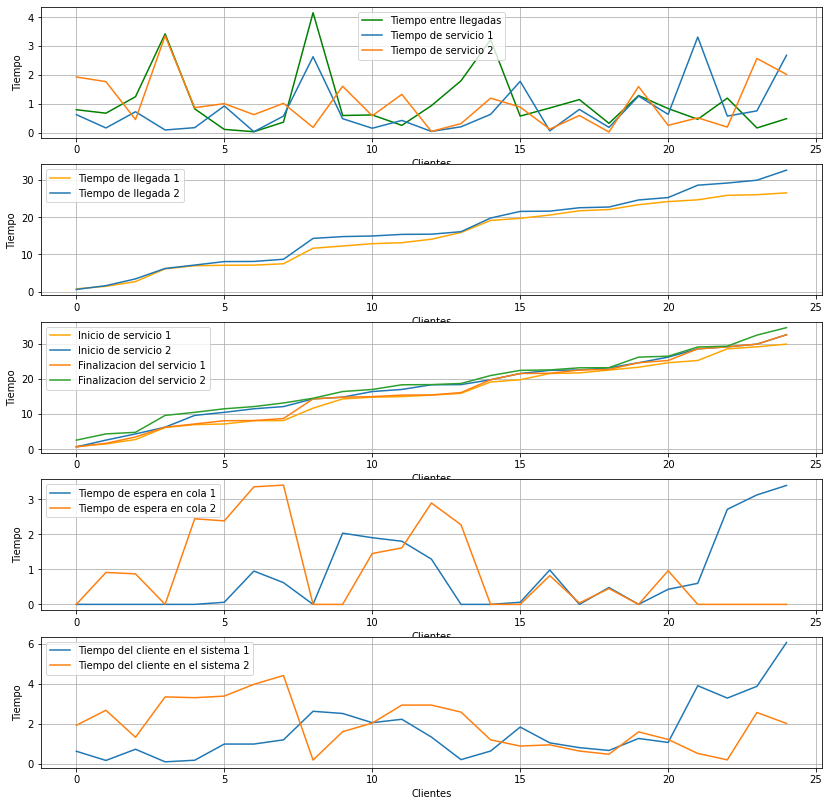

In [18]:

plt.figure(figsize=(14,14))

plt.subplot(511)
plt.plot(T_entre_Llegadas_G, color= 'green', label='Tiempo entre llegadas')
plt.plot(T_de_Servicio_G1, label='Tiempo de servicio 1')
plt.plot(T_de_Servicio_G2, label='Tiempo de servicio 2')
plt.ylabel('Tiempo')
plt.xlabel('Clientes')
plt.legend()
plt.grid(True)

plt.subplot(512)
plt.plot(T_llegada1, color='orange', label='Tiempo de llegada 1')
plt.plot(T_llegada2, label='Tiempo de llegada 2')

plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

plt.subplot(513)

plt.plot(Inicio_T_servicio1, color='orange', label='Inicio de servicio 1')
plt.plot(Inicio_T_servicio2, label='Inicio de servicio 2')

plt.plot(Final_T_Servicio1, label='Finalizacion del servicio 1')
plt.plot(Final_T_Servicio2, label='Finalizacion del servicio 2')
plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)


plt.subplot(514)

plt.plot(T_Espera_en_Cola1, label='Tiempo de espera en cola 1')
plt.plot(T_Espera_en_Cola2, label='Tiempo de espera en cola 2')

plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)


plt.subplot(515)
plt.plot(T_Cliente_en_Sistema1, label='Tiempo del cliente en el sistema 1')
plt.plot(T_Cliente_en_Sistema2, label='Tiempo del cliente en el sistema 2')


plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()

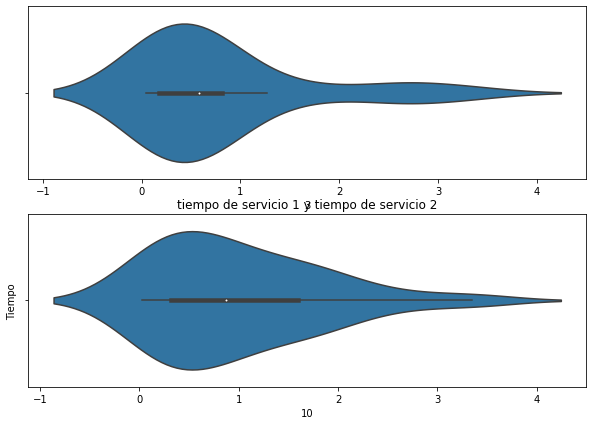

In [17]:
 
datas = pd.DataFrame.transpose(pd.DataFrame(data))
fig, ax = plt.subplots(2)
plt.title('tiempo de servicio 1 y tiempo de servicio 2')
plt.ylabel('Tiempo')
plt.xlabel('Clientes')
fig.set_size_inches(10, 7)

sns.violinplot(x = 3, data = datas, kind = "violin", inner = "box", ax = ax[0]);
sns.violinplot(x = 10, data = datas, kind = "violin", inner = "box", ax = ax[1]);

